NAME : NG KOK TENG

PROGRAMME : BACHELOR OF COMUPUTER SCIENCE

MODULE : ITS65704 DATA SCIENCE PRINCIPLES

In [1]:
# Import the library that is commonly used in data prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from scipy import stats
%matplotlib inline

# Frame the problem 
The major problem to be interpret in this project is to establish a machine learning model that is used for doing the predictions and classification with the patient who has existed with the heart disease in hospital centre. There have a couple of machine learning techniques can be used to do the prediction which is classfications, regression, and others. Hence, there should identify which machine learning techniques are more suitable for the dataset before fitting the data model to the dataset, so the prediction's result will be more precise than randomly choosing a machine learning techniques. Hospital centre had provided this dataset is required us to explored the dataset and identify the relationships between each attributes and features to easy to know which reason cause the heart disease incresing. Hence, our goal is predict the presenced of the heart disease based on this dataset.

# Load the data

In [2]:
# Load the heart.csv dataset by using pandas
df = pd.read_csv('heart.csv')
# Print the df
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Check the type of the dataframe
type(df)

pandas.core.frame.DataFrame

Describe of the features

age = Age, sex = Gender, cp  = The ache of chest, trestbps = The blood pressure while the patient is resting, chol = Serum cholestoral, fbs = Fasting blood sugar, restecg = Resting electrocardiographic results, thalach = Maximum heart rate achieved, exang = Exercise induced angina, oldpeak = ST depression induced by exercise relative to rest, slope = The slope of the peak exercise ST segment, ca = Number of major vessels (0-3) colored by flourosopy, thal = Thal: 0 = normal; 1 = fixed defect; 2 = reversable defect, target = 1 = Disease, 0 = No Disease

In [4]:
# Print the type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Print the statistical index of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Print the size of the data
df.shape

(303, 14)

The data has stored in the dataframe which is called 'df' have 303 rows and 14 columns before remove the outlier data and perform the feature extraction step.

# Clean data

In [7]:
# Check the total of missing the value in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As the result that can be viewed at the above, there don't have any missing value in the dataset. Hence, there doesn't need to use any method to solve the missing value issues. Besides, the features that have been shown in the dataset are already labeled as well

In [8]:
# Rename the feature's name to more easy for understanding
df.rename(columns={'sex':'gender'},inplace=True)

In [9]:
# Print the type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Removal Outlier

In [10]:
# Check the 1st and 3rd quantile of the feature of the thalach
Q1 = df.thalach.quantile(0.25)
Q3 = df.thalach.quantile(0.75)
Q1,Q3

(133.5, 166.0)

In [11]:
# Get the IQR
IQR = Q3 - Q1
IQR

32.5

In [12]:
# Get the lower limit and upper limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(84.75, 214.75)

In [13]:
# Remove the outlier data of the thalach
df = df[(df.thalach>lower_limit)&(df.thalach<upper_limit)]
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
# Check the 1st and 3rd quantile of the feature of the chol
Q1 = df.chol.quantile(0.25)
Q3 = df.chol.quantile(0.75)
Q1,Q3

(211.0, 274.75)

In [15]:
# Get the IQR
IQR = Q3 - Q1
IQR

63.75

In [16]:
# Get the lower limit and upper limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(115.375, 370.375)

In [17]:
# Remove the outlier data of the chol
df = df[(df.chol>lower_limit)&(df.chol<upper_limit)]
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
# Check the 1st and 3rd quantile of the feature of the trestbps
Q1 = df.trestbps.quantile(0.25)
Q3 = df.trestbps.quantile(0.75)
Q1,Q3

(120.0, 140.0)

In [19]:
# Get the IQR
IQR = Q3 - Q1
IQR

20.0

In [20]:
# Get the lower limit and upper limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(90.0, 170.0)

In [21]:
# Remove the outlier data of the trestbps
df = df[(df.trestbps>lower_limit)&(df.trestbps<upper_limit)]
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
# Check the 1st and 3rd quantile of the feature of the oldpeak
Q1 = df.oldpeak.quantile(0.25)
Q3 = df.oldpeak.quantile(0.75)
Q1,Q3

(0.0, 1.6)

In [23]:
# Get the IQR
IQR = Q3 - Q1
IQR

1.6

In [24]:
# Get the lower limit and upper limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-2.4000000000000004, 4.0)

In [25]:
# Remove the outlier data of the trestbps
df = df[(df.oldpeak>lower_limit)&(df.oldpeak<upper_limit)]
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


The reason want to remove the outlier data is outlier data will increase the volatitlity in the dataset, besides that will also decrease the statistical power. Hence, there should remove the outlier data to make the statistical result and prediction result become more statistically significant.

After remove outlier data, there are remaining the 279 rows of data in the dataset

# Explore data

In [26]:
# Check the type of the dataframe
type(df)

pandas.core.frame.DataFrame

In [27]:
# Print the first five rows data
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# Print the statistical index of the data
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.00000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,53.874552,0.698925,0.985663,129.301075,241.924731,0.139785,0.53405,150.064516,0.311828,0.926165,1.437276,0.706093,2.290323,0.566308
std,9.194659,0.459550,1.021254,14.716104,44.645342,0.347387,0.51393,22.875550,0.464072,1.000753,0.595705,1.003411,0.604194,0.496474
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.00000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.500000,0.000000,0.00000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.00000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.500000,0.000000,1.00000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,360.000000,1.000000,2.00000,202.000000,1.000000,3.800000,2.000000,4.000000,3.000000,1.000000


In [29]:
# Print the statistical index of the data and transpose the matrices
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,279.0,53.874552,9.194659,29.0,46.0,54.0,60.0,77.0
gender,279.0,0.698925,0.459550,0.0,0.0,1.0,1.0,1.0
cp,279.0,0.985663,1.021254,0.0,0.0,1.0,2.0,3.0
trestbps,279.0,129.301075,14.716104,94.0,120.0,130.0,140.0,165.0
chol,279.0,241.924731,44.645342,126.0,209.5,239.0,269.5,360.0
fbs,279.0,0.139785,0.347387,0.0,0.0,0.0,0.0,1.0
restecg,279.0,0.534050,0.513930,0.0,0.0,1.0,1.0,2.0
thalach,279.0,150.064516,22.875550,88.0,132.5,153.0,168.0,202.0
exang,279.0,0.311828,0.464072,0.0,0.0,0.0,1.0,1.0
oldpeak,279.0,0.926165,1.000753,0.0,0.0,0.6,1.6,3.8


In [30]:
# Print the type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       279 non-null    int64  
 1   gender    279 non-null    int64  
 2   cp        279 non-null    int64  
 3   trestbps  279 non-null    int64  
 4   chol      279 non-null    int64  
 5   fbs       279 non-null    int64  
 6   restecg   279 non-null    int64  
 7   thalach   279 non-null    int64  
 8   exang     279 non-null    int64  
 9   oldpeak   279 non-null    float64
 10  slope     279 non-null    int64  
 11  ca        279 non-null    int64  
 12  thal      279 non-null    int64  
 13  target    279 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.7 KB


In [31]:
# Print the size of the data
df.shape

(279, 14)

In [32]:
# Get the median of each features (columns) in the dataframe which is called 'df'
import statistics
print("The median of age : ",statistics.median(df['age']))
print("The median of gender : ",statistics.median(df['gender']))
print("The median of cp : ",statistics.median(df['cp']))
print("The median of trestbps : ",statistics.median(df['trestbps']))
print("The median of chol : ",statistics.median(df['chol']))
print("The median of fbs : ",statistics.median(df['fbs']))
print("The median of restecg : ",statistics.median(df['restecg']))
print("The median of thalach : ",statistics.median(df['thalach']))
print("The median of exang : ",statistics.median(df['exang']))
print("The median of oldpeak : ",statistics.median(df['oldpeak']))
print("The median of slope : ",statistics.median(df['slope']))
print("The median of ca : ",statistics.median(df['ca']))
print("The median of thal : ",statistics.median(df['thal']))
print("The median of target : ",statistics.median(df['target']))

The median of age :  54
The median of gender :  1
The median of cp :  1
The median of trestbps :  130
The median of chol :  239
The median of fbs :  0
The median of restecg :  1
The median of thalach :  153
The median of exang :  0
The median of oldpeak :  0.6
The median of slope :  1
The median of ca :  0
The median of thal :  2
The median of target :  1


In [33]:
# Get the mode of each features (columns) in the dataframe which is called 'df'
print("The mode of age : ", statistics.mode(df['age']))
print("The median of gender : ",statistics.mode(df['gender']))
print("The median of cp : ",statistics.mode(df['cp']))
print("The median of trestbps : ",statistics.mode(df['trestbps']))
print("The median of chol : ",statistics.mode(df['chol']))
print("The median of fbs : ",statistics.mode(df['fbs']))
print("The median of restecg : ",statistics.mode(df['restecg']))
print("The median of thalach : ",statistics.mode(df['thalach']))
print("The median of exang : ",statistics.mode(df['exang']))
print("The median of oldpeak : ",statistics.mode(df['oldpeak']))
print("The median of slope : ",statistics.mode(df['slope']))
print("The median of ca : ",statistics.mode(df['ca']))
print("The median of thal : ",statistics.mode(df['thal']))
print("The median of target : ",statistics.mode(df['target']))

The mode of age :  57
The median of gender :  1
The median of cp :  0
The median of trestbps :  130
The median of chol :  204
The median of fbs :  0
The median of restecg :  1
The median of thalach :  162
The median of exang :  0
The median of oldpeak :  0.0
The median of slope :  2
The median of ca :  0
The median of thal :  2
The median of target :  1


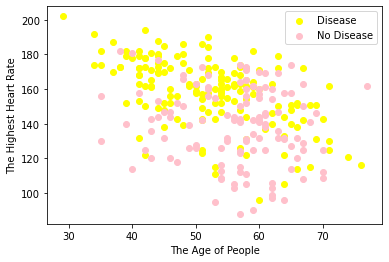

In [34]:
# Plot to view the relationship between age and highest heart rate for the patient who has disease or no disease

# Choosing the feature of age and thalach from the dataframe
# But there are choosing separate means the people who has heart disease will be grouped as yellow, and people who hasn't heart disease will be grouped as pink
plt.scatter(x = df.age[df.target == 1], y=df.thalach[(df.target == 1)], c = "yellow")
plt.scatter(x = df.age[df.target == 0], y=df.thalach[(df.target == 0)], c = "pink")
plt.legend(["Disease", "No Disease"])
plt.xlabel("The Age of People")
plt.ylabel("The Highest Heart Rate")
plt.show()

As the graph has been shown at the above, there can view the patient who has infected heart disease. There has shown the patients who have infected of heart disease their maximum heart rate are higher than other patient doesn't has infected the heart disease. Besidesm, the younger patient's maximum heart rate are higher than the older patients.

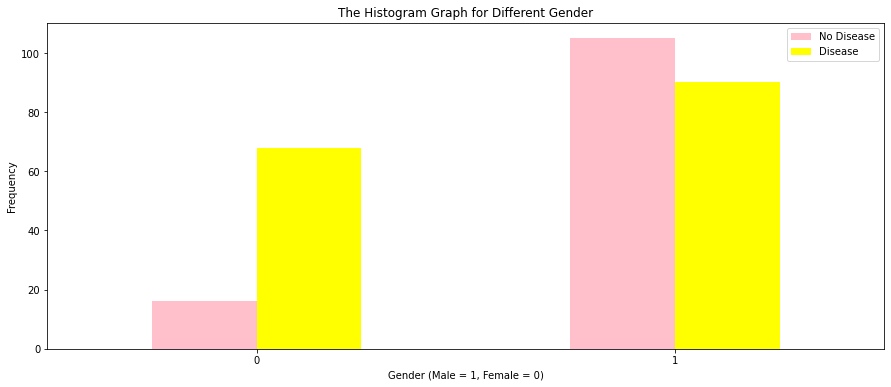

In [35]:
# Plot the crosstab graph 
pd.crosstab(df.gender,df.target).plot(kind="bar",figsize=(15,6),color=['pink','yellow' ])
plt.title('The Histogram Graph for Different Gender')
plt.xlabel('Gender (Male = 1, Female = 0)')
plt.ylabel('Frequency')
plt.xticks(rotation=1)

# Set the legend let the user easily to know
plt.legend(["No Disease", "Disease"])
plt.show()

There can view from the crosstab graph the pink color is negative heart disease and yellow color with positive heart disease, and the x-label which is 1 is male and 0 is female. There can view from the graph the male have the higher frequency of having the heart disease than female. However, there can also view the frequency of females who have disease are higher than who doesn't has heart disaease.

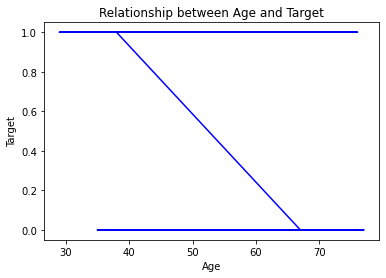

In [36]:
# Plot the line plot
plt.figure()
plt.plot(df['age'], df['target'], 'b')
plt.xlabel('Age')
plt.ylabel('Target')
plt.title('Relationship between Age and Target')
plt.show()

Text(0.5, 1.0, 'trestbps vs Target distribution')

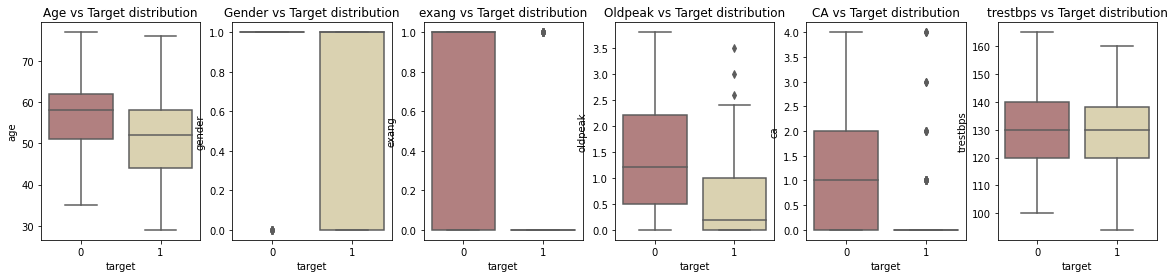

In [37]:
fig, axes = plt.subplots(ncols=6,figsize=(20,4))
sns.boxplot(x='target',y='age',data=df, palette='pink', ax=axes[0])
axes[0].set_title('Age vs Target distribution')

sns.boxplot(x='target',y='gender' ,data=df, palette='pink', ax=axes[1])
axes[1].set_title("Gender vs Target distribution")

sns.boxplot(x='target',y='exang' ,data=df, palette='pink', ax=axes[2])
axes[2].set_title("exang vs Target distribution")

sns.boxplot(x='target',y='oldpeak' ,data=df, palette='pink', ax=axes[3])
axes[3].set_title("Oldpeak vs Target distribution")

sns.boxplot(x='target',y='ca' ,data=df, palette='pink', ax=axes[4])
axes[4].set_title("CA vs Target distribution")

sns.boxplot(x='target',y='trestbps',data=df, palette='pink',ax=axes[5])
axes[5].set_title("trestbps vs Target distribution")

Text(0.5, 1.0, 'thal vs Target ')

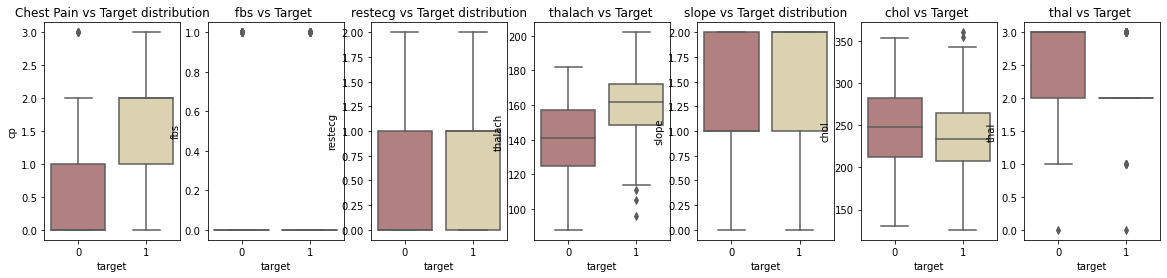

In [38]:
fig, axes = plt.subplots(ncols=7,figsize=(20,4))
sns.boxplot(x='target',y='cp',data=df, palette='pink', ax=axes[0])
axes[0].set_title('Chest Pain vs Target distribution')

sns.boxplot(x='target',y='fbs' ,data=df, palette='pink', ax=axes[1])
axes[1].set_title("fbs vs Target ")

sns.boxplot(x='target',y='restecg' ,data=df, palette='pink', ax=axes[2])
axes[2].set_title("restecg vs Target distribution")

sns.boxplot(x='target',y='thalach' ,data=df, palette='pink', ax=axes[3])
axes[3].set_title("thalach vs Target ")

sns.boxplot(x='target',y='slope' ,data=df, palette='pink', ax=axes[4])
axes[4].set_title("slope vs Target distribution")

sns.boxplot(x='target',y='chol' ,data=df, palette='pink', ax=axes[5])
axes[5].set_title("chol vs Target ")

sns.boxplot(x='target',y='thal' ,data=df, palette='pink', ax=axes[6])
axes[6].set_title("thal vs Target ")

From the boxplot, there can view there doesn't have any outlier data because there has already removed all the all outlier data in the previous step. Hence, there can view the details about the data such as first quantile, second quantile, third quantile, and others. Besides, this boxplot graph has separate the people (target) who have the heart disease (label as 1) and who doesn't have the heart disease (label as 0).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'oldpeak Distribution \n (No Heart Disease)')

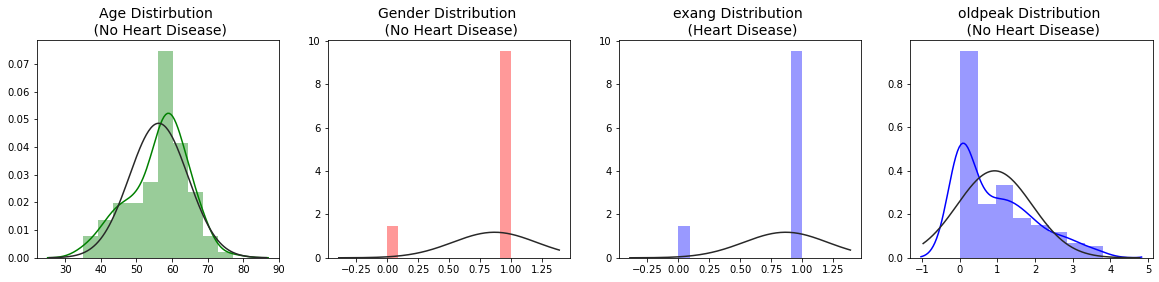

In [39]:
# Import the library
from scipy.stats import norm

# Set the graph plot as 4 in a row and set the figure size as (20,4)
f,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

# Plot the age graph about the patient who has negative with heart disease
age_d=df['age'].loc[df['target']==0].values
sns.distplot(age_d,ax=ax1,fit=norm,color='g')
ax1.set_title("Age Distirbution \n (No Heart Disease)", fontsize='14')

# Plot the gender graph about the patient who has negative with heart disease
sex_d=df['gender'].loc[df['target']==0].values
sns.distplot(sex_d,ax=ax2,fit=norm,color='red')
ax2.set_title("Gender Distribution \n (No Heart Disease)", fontsize='14')

# Plot the exang graph about the patient who has positive with heart disease
exang_d=df['exang'].loc[df['target']==1].values
sns.distplot(sex_d,ax=ax3,fit=norm,color='blue')
ax3.set_title("exang Distribution \n (Heart Disease)", fontsize='14')

# Plot the old graph about the patient who has negative with heart disease
oldpeak_d=df['oldpeak'].values
sns.distplot(oldpeak_d,ax=ax4,fit=norm,color='blue')
ax4.set_title("oldpeak Distribution \n (No Heart Disease)", fontsize='14')

The first graph of Age Distribution (No Heart Disease), there can see the age group of 55 to 60 is the highest group who doesn't have the heart disease. Besides, there can also view male has lower risk to get the heart disease in the second graph. In addition, theere can view the people who don't have the exercise behavior will easily to get the heart disease in the third graph.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'thalach Distribution \n (No Heart Disease)')

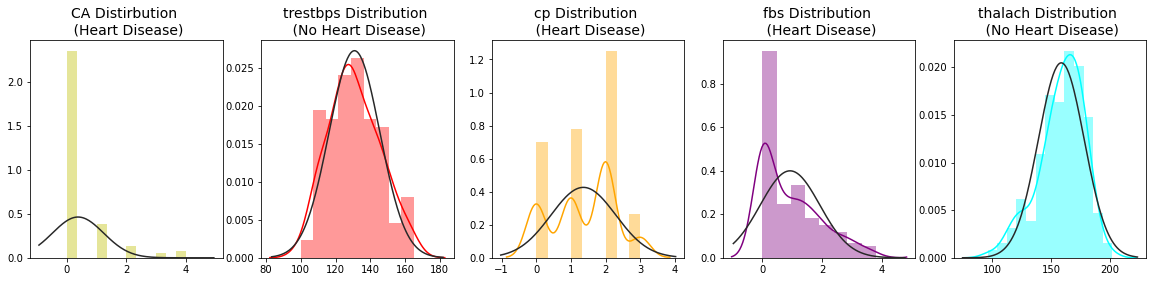

In [40]:
# Set the graph plot as 5 in a row and set the figure size as (20,4)
f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(20,4))

# Plot the ca graph about the patient who has positive with heart disease
ca_d=df['ca'].loc[df['target']==1].values
sns.distplot(ca_d,ax=ax1,fit=norm,color='y')
ax1.set_title("CA Distirbution \n (Heart Disease)", fontsize='14')

# Plot tge trestbps graph about the patient who has negative with heart disease
trestbps_d=df['trestbps'].loc[df['target']==0].values
sns.distplot(trestbps_d,ax=ax2,fit=norm,color='red')
ax2.set_title("trestbps Distribution \n (No Heart Disease)", fontsize='14')

# Plot the cp graph about the patient who has positive with heart disease
cp_d=df['cp'].loc[df['target']==1].values
sns.distplot(cp_d,ax=ax3,fit=norm,color='orange')
ax3.set_title("cp Distribution \n (Heart Disease)", fontsize='14')

# Plot the oldpeak graph about the patient who has positive with heart disease
fbs_d=df['oldpeak'].values
sns.distplot(fbs_d,ax=ax4,fit=norm,color='purple')
ax4.set_title("fbs Distribution \n (Heart Disease)", fontsize='14')

# Plot the thalach graph about the patients who has nagetive with heart disease
thalach_d=df['thalach'].loc[df['target']==1].values
sns.distplot(thalach_d,ax=ax5,fit=norm,color='cyan')
ax5.set_title("thalach Distribution \n (No Heart Disease)", fontsize='14')

There can view the people how has the lowest 'ca' has the high probability to get the heart disease in first graph, while the user are resting, their heart beat are maintain between 120 and 150 the probability of getting heart disease will be decreased in second graph. People who has the chest pain (cp) situation are more likely to have heart disease issues than people with cp equals to 0. In the forth graph, there can view the people who has the lower blood sugar that will easily get heart disease.

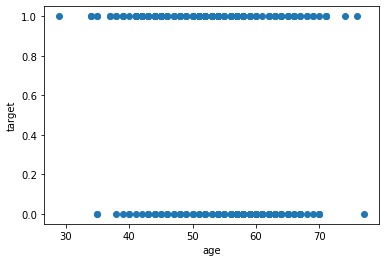

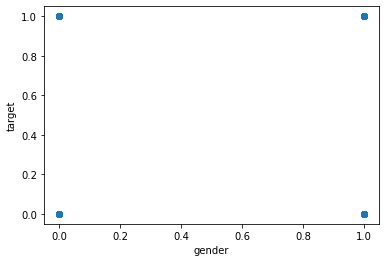

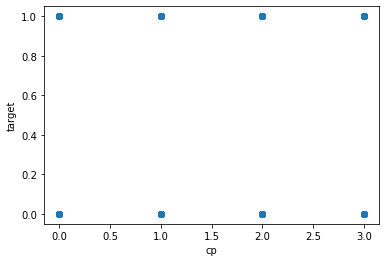

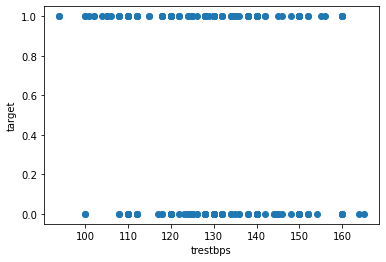

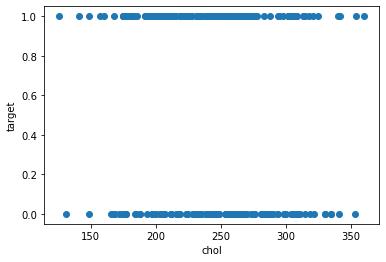

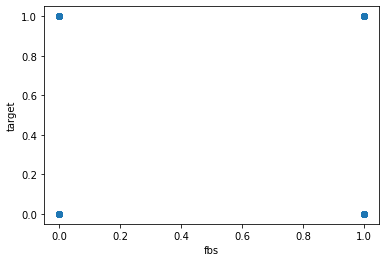

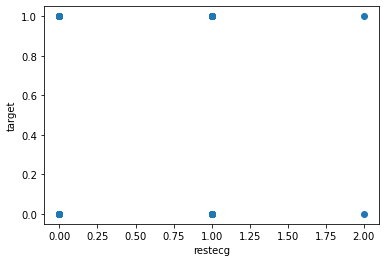

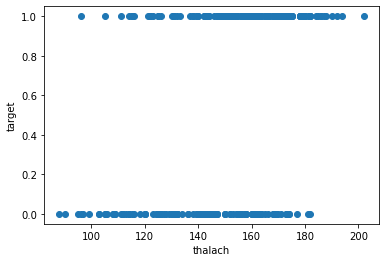

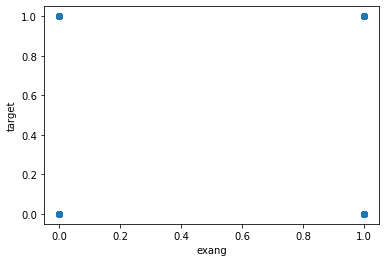

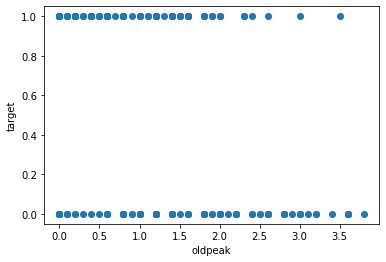

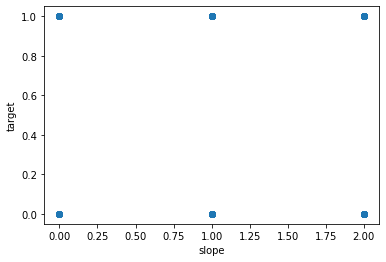

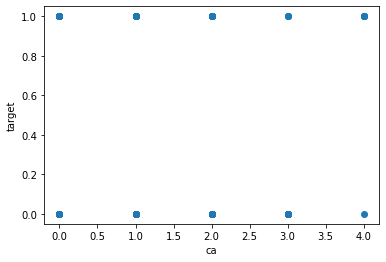

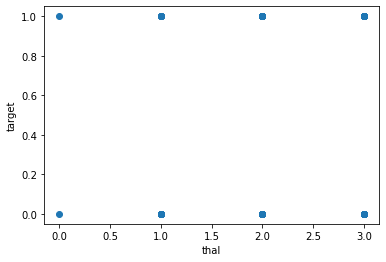

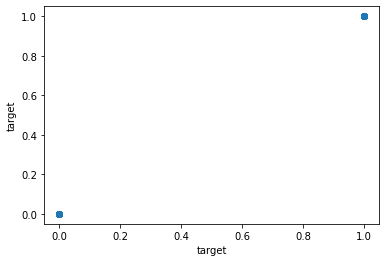

In [41]:
# Print the relationship between each column with target
for i in df.columns: 
    plt.scatter(df[i], df['target'])
    plt.ylabel("target")
    plt.xlabel(i)
    plt.show()

<ipython-input-42-cfdb2a1e0b78>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax,bins = 45)


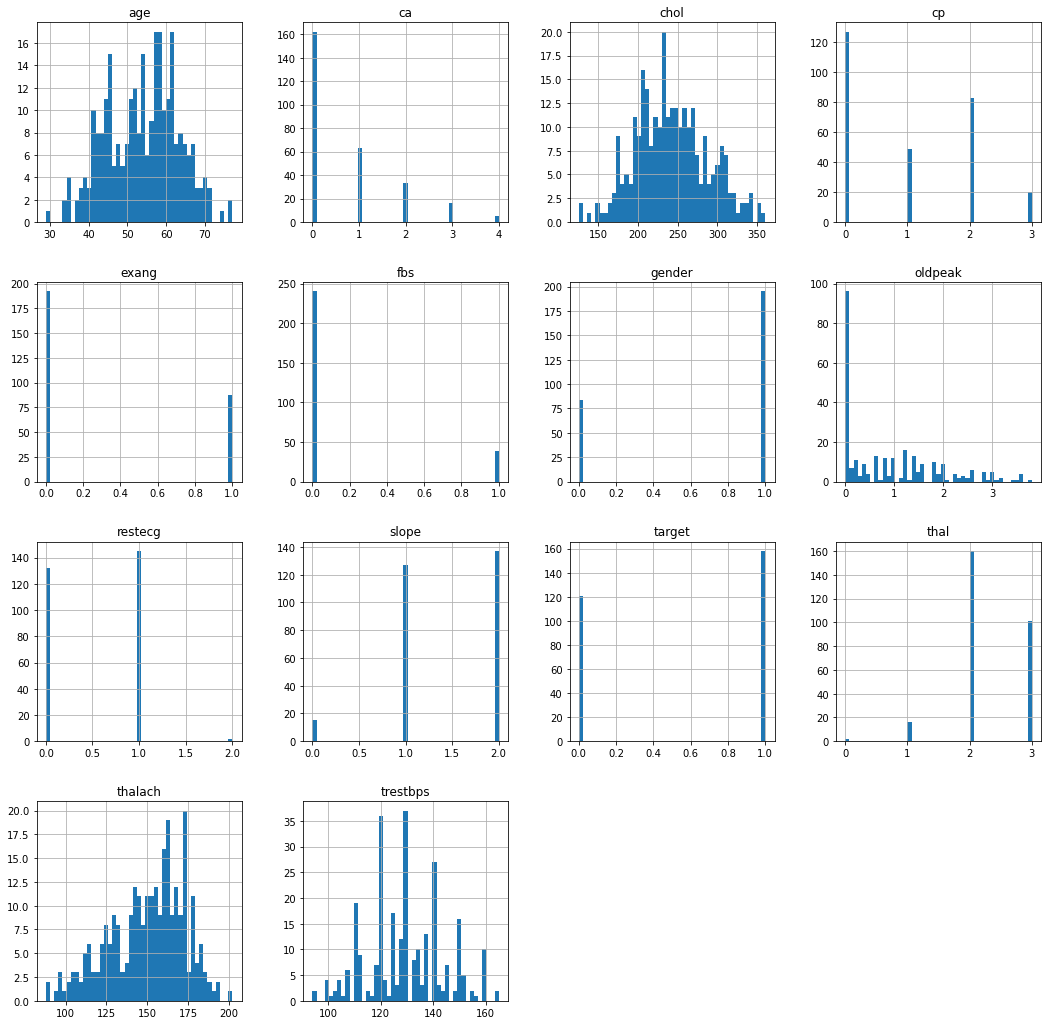

In [42]:
# Plotting the histogram graph for all the features in the dataframe
# Get the frequency of each column (feature)
fig = plt.figure(figsize = (18,18))
ax = fig.gca()
# Set the bins as 45 in each histogram graph
df.hist(ax=ax,bins = 45)
plt.show()

In [43]:
# Import the library that will be used
import seaborn as sns

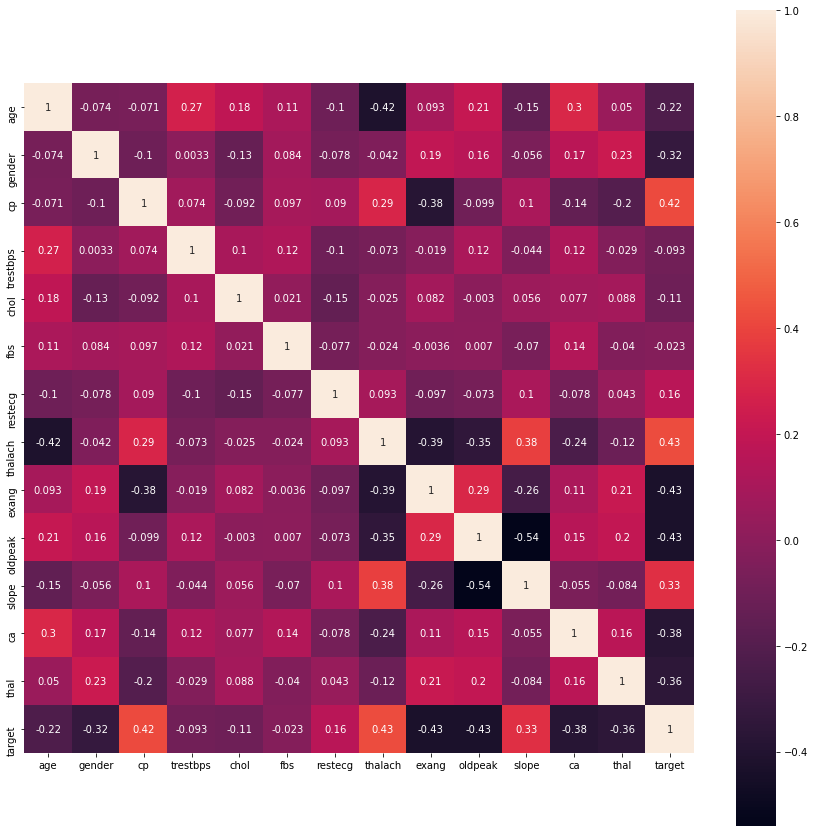

In [44]:
# Print the correlation graph
# Find the pairwise correlation of all features in the df (dataframe)
dfData = df.corr()
# Set the graph's size
plt.subplots(figsize=(15, 15)) 
sns.heatmap(dfData, annot=True, vmax=1, square=True)
plt.show()

There can refer from the correlation graph at the above, there has shown the fbs and chol are the lower correlated with the feature of target. Besides, other features are a significant correlation with the feature of target.

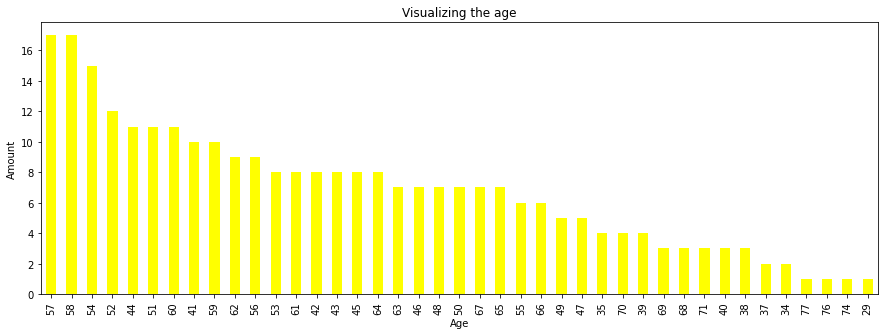

In [45]:
plt.subplots(figsize=(15,5))
df['age'].value_counts(normalize = True)
df['age'].value_counts(dropna = False).plot.bar(color = 'yellow')
plt.title('Visualizing the age')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

The bar plot has shown at the above about the number of people has presenced heart disease, and the bar plot is plotted based on their age and the age group are including different gender such as female and male.

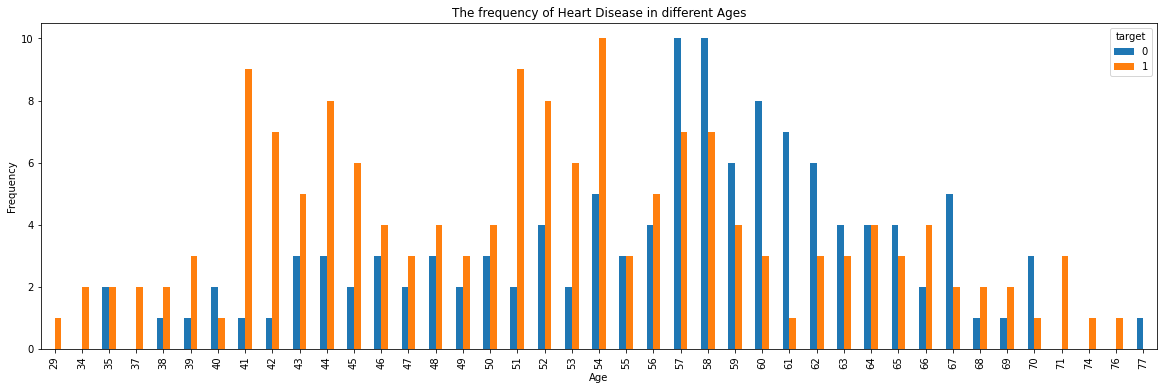

In [46]:
pd.crosstab(df['age'],df['target']).plot(kind="bar",figsize=(20,6))
plt.title('The frequency of Heart Disease in different Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The bar graph has shown at the above about the number of people who has getting heart disease based on their age and grouped by male and female. There has shown the age group of 51 to 58 has a higher chance to getting heart disease. Besides, there has also shown the result as the chance to getting heart disease will be decreased for the age group start from 57 until 77.

In [47]:
# View the data in the dataframe
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 53 65 46
 45 39 52 47 62 34 35 29 55 60 68 67 74 76 70 38 77]
gender : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 150 110 135 160 105 125 142 155 104 138 128 108 134 122
 115 118 100 124  94 112 102 152 101 132 148 129 136 126 106 156 146 117
 165 144 123 154 164]
chol : [233 250 204 236 354 192 294 263 168 239 275 266 211 283 219 340 226 247
 234 243 199 302 212 175 197 198 177 273 213 304 232 269 360 308 245 208
 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309 186
 203 183 220 209 258 227 261 221 205 240 318 298 277 214 248 255 207 223
 288 160 315 246 244 195 196 254 126 313 262 215 193 271 268 267 210 295
 306 178 242 180 228 149 278 253 342 157 286 229 284 224 206 167 230 335
 276 353 225 330 290 172 305 188 282 185 270 307 249 341 174 281 289 322
 299 300 293 274 184 259 200 218 319 166 311 169 176 241 131]
fbs : [1 0]
restecg : [0 1 2]
thalach : [150 187 172 178 163 148 153 173 174 16

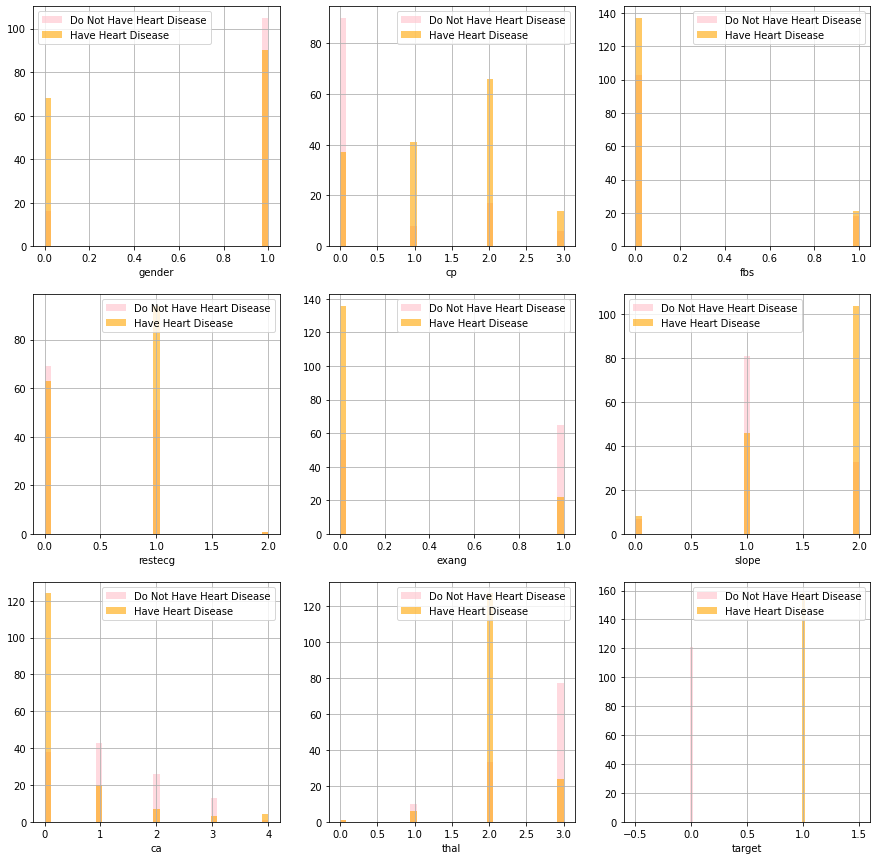

In [48]:
plt.figure(figsize=(15, 15))

# Plot the graph in 3 coloumn in a row and there will run it into another row when there has fulfill the index of (3,3)
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    # Set the positive heart disease and negative heart disease patient into different color
    df[df["target"] == 0][column].hist(bins=35, color='pink', label='Do Not Have Heart Disease', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='orange', label='Have Heart Disease', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

There can view from graph, people who has the chest pain (cp) situation are more likely to have heart disease issues than people with cp equals to 0.
For the restecg graph, the people who has unnormal heart rate are more likely to have the heart disease.
Besides, the people who has do exercise have the lower risk to have the heart disease than those who doesn't do exercise.
In addition, who has the value of 2 with the feature of the slope are more likely to have heart disease than those value of 0 and 0 with slope.
There can view from the graph has shown the people who has 0 with the feature of the ca are more likely to have the heart disease because their blood movement are slow.
People with that value equal to 2 with the feature of the thal are more likely to have heart disease.

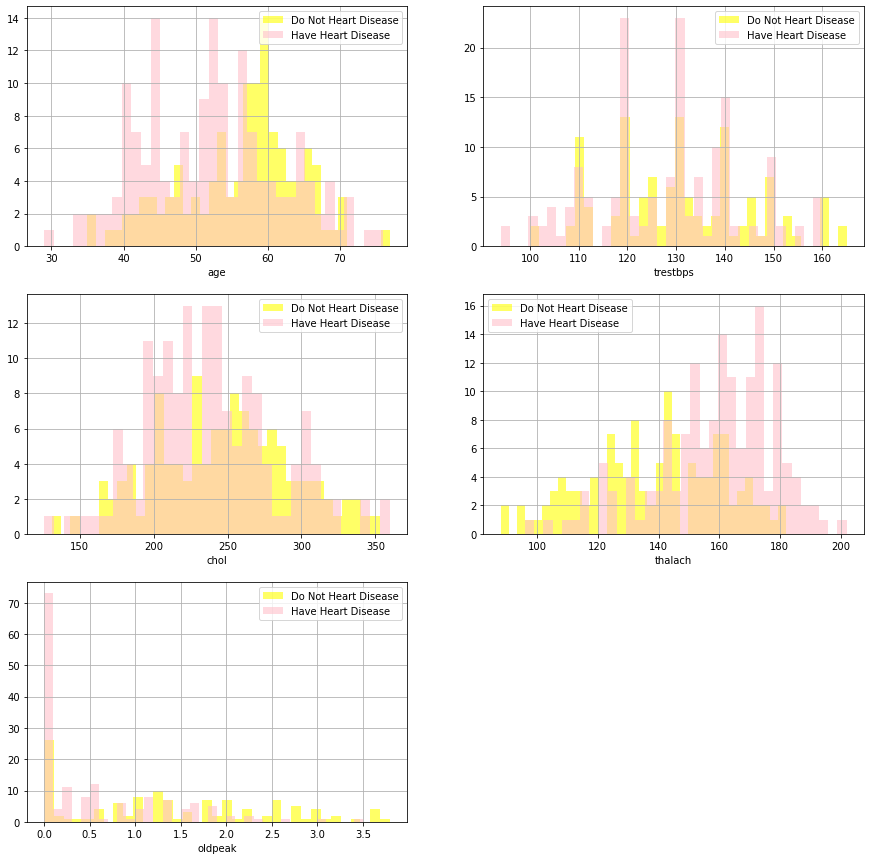

In [49]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='yellow', label='Do Not Heart Disease', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='pink', label='Have Heart Disease', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Trestbps : The resting blood pressure anything above between 130 and 140 is typically a reason for regard. If the people chol above 200 that should be more regard. People who has the maximum heart rate above 140, that is more likely to have the heart disease. The oldpeak ST depression caused by the exercise relative to rest looks at stress of heart during excercise unhealthy heart will look more stress.

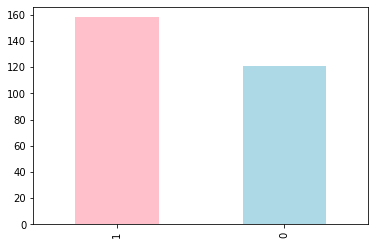

In [50]:
# Plot the graph about count the amount of health disease in this dataframe
df.target.value_counts().plot(kind="bar", color=["pink", "lightblue"])

There can view from the graph at the above, there has shown 159 of individuals who have the positive with the heart disease, and 120 of individuals who haven't the positive with the heart disease.

                  Alpha     Beta    Gamma       Mu     Sigma     Lambda         AICc          BIC
Distribution                                                                                     
Weibull_2P      159.592   7.9509                                         2523.189482  2530.408427
Weibull_3P      159.592   7.9509        0                                2525.233276  2536.039639
Normal_2P                                  150.065   22.8345             2541.387692  2548.606637
Gamma_2P        3.75764  39.9358                                         2558.549607  2565.768552
Gamma_3P        3.75763   39.936        0                                2560.593401  2571.399764
Lognormal_2P                               4.99849  0.162225             2570.097713  2577.316658
Lognormal_3P                      3.80574   4.9721  0.166871             2573.167776  2577.316658
Exponential_2P                     87.999                      0.016112  2865.573799  2872.792744
Exponential_1P      

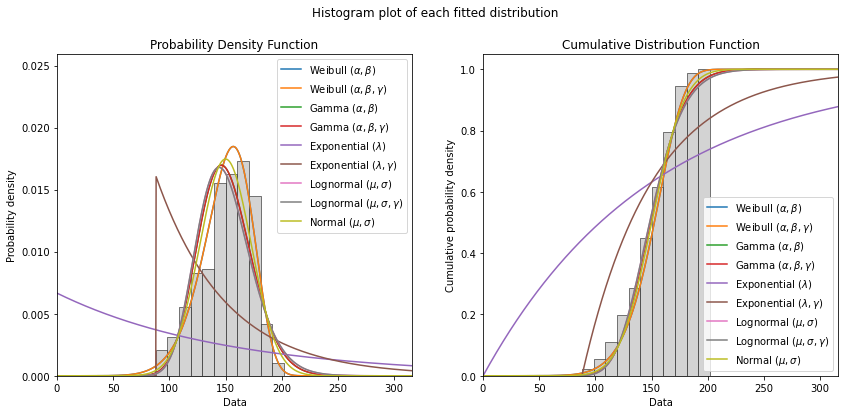

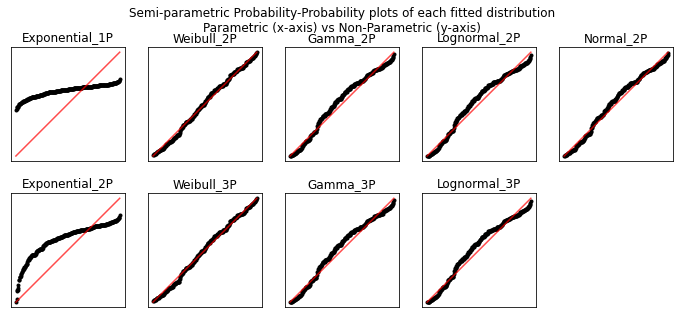

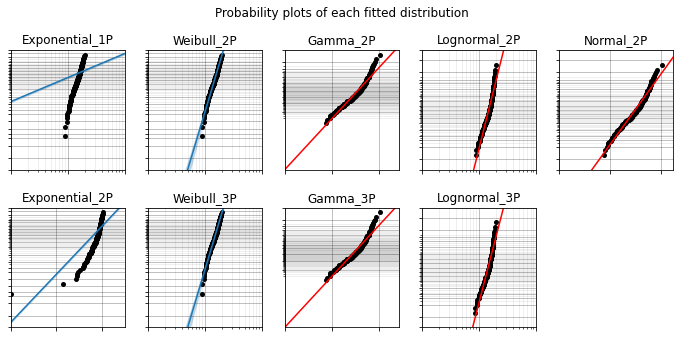

In [51]:
# Identify the distribution and fitting all distribution to the thalach feature
from reliability.Fitters import Fit_Everything
Fit_Everything(failures=np.array(df['thalach']), show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True)
plt.show()

Value of AIC and BIC is the most important part when there are finding the most approriate distribution. The lower the value of AICc and BIC, and the better fit of the data. There has shown at the above table, the distibution of Weibull_2P Distribution has the lowest AICc and BIC.

Based on the information above, the smallest AICc is  2523.189482 and the smallest BIC is 2530.408427. Weibull_2P Distribution has the best fit graph where all the plot are closest to the red line.

Therefore, the best fit distribution is Weibull_2P Distribution for the feature of thalac (highest heart rate).

# Model the data

K-Nearest Neighbors

In [52]:
# Perform the feature extraction
# There can view 'cp', 'thal', and 'slope' are categories variable, so there should convert it to dummies variables
# Hence, that can be easier to view in the graph which is generated by the machine learning algorithm
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
# Drop the 'cp', 'thal', 'slope' column
df = df.drop(columns = ['cp', 'thal', 'slope'])
# Add the dummies variables into the df dataframe
spare = [df, a, b, c]
df = pd.concat(spare, axis = 1)
# Print the first five row data
df.head()

,age,gender,trestbps,chol,...,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,...,0,1,0,0
1,37,1,130,250,...,0,1,0,0
2,41,0,130,204,...,0,0,0,1
3,56,1,120,236,...,0,0,0,1
4,57,0,120,354,...,0,0,0,1


That is easy to view that is the labelled data, the feature inside the dataset have their own meaning. Hence, there should use the supervised machine learning to do the prediction, the supervised machine learning have K-NN, Logistic Regression, Decision Tree, and others.

In [53]:
# Import the KNN Machine Learning algorithm from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [54]:
# Perform the feature selection
x = df.drop(['target'], axis = 1)
y = df['target']

In [55]:
# Split the training and testing data (80% Training and 20% Testing)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=17)

In [56]:
# Transpose matrices position of x_train, y_train, x_test, and y_test
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [57]:
# Set the n_neighbours as 2 because the target has only two situations, which is disease or no disease
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train.T, y_train.T)
pred = knn.predict(x_test.T)

# Print the score of 2-NN
print("Score of 2-NN :", knn.score(x_test.T,y_test.T)*100, "%")

# View the prediction value generate by the x_test data
print("Predicted value : ", pred)

Score of 2-NN : 58.92857142857143 %
Predicted value :  [1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0]


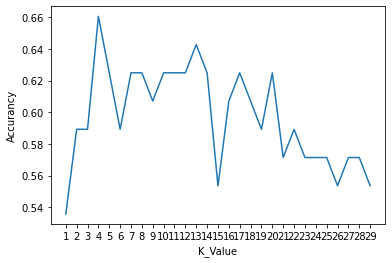

Maximum KNN Score is :  66.07142857142857 %


In [58]:
# Find the best fit near neighbors value for this dataset
accuracy = {}
score = []
for i in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train.T, y_train.T)
    score.append(knn2.score(x_test.T, y_test.T))

# Plot the KNN graph
plt.plot(range(1,30), score)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K_Value")
plt.ylabel("Accurancy")
plt.show()

# Find the maximum accurancy score from the score list
acc = max(score)*100
accuracy['KNN'] = acc
print("Maximum KNN Score is : ", acc, "%")

There can view when K-value equals to 4, there will get the highest accurancy. Besides, the accurancy is 66.0714% when the K-Value is 4. The reason to choose KNN be the data model is KNN can be equally influence when the target variable is continuous variables in the nature, and the KNN is also suitable for the classification data.

In [59]:
# Import the library to find the confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [60]:
# Print the classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.51      0.75      0.61        24
           1       0.71      0.47      0.57        32

    accuracy                           0.59        56
   macro avg       0.61      0.61      0.59        56
weighted avg       0.63      0.59      0.58        56



The classification report is used view how many predictions are true and false. That could be true positive or false positive, true negative, and false negative as well, all of them  are used to predict the value to generate the classification report. The precision is displaying the percent of how many predictions were correct, Recall is displaying how many percent of positive cases there has done. F1-score is displaying how many percent of positive prediction were correct. Besides, the 0 in the classification is the people who doesn't get heart disease, and the 1 in the classification is the people who have get the heart disease.

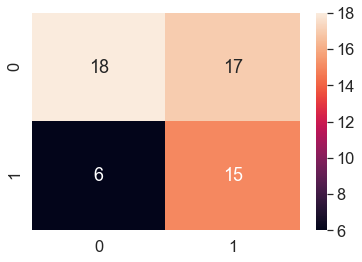

In [62]:
# Print the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

The generated confusion matrix shows that the KNN has correctly predicted 16 individuals who don't have infected heart disease and 14 individuals who have infected heart disease. The remaining 26 predictions are not correct so the accuracncy of the model is only 66.0714 %.

# Evaluate the model

Logistic Regression

In [63]:
# Import necessary library
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [64]:
# Perform the feature selections
x = df.drop(['target'], axis = 1)
y = df['target']

In [65]:
# Split the data into testing and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [66]:
# Define the object for the logistic regression and fit the training data of x and y into logistic regression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [67]:
# Perform the prediction process
pred1 = model.predict(x_test)

In [68]:
# Get the accurancy by using the logistic regression to perform the prediction
print("Accuracy : ", model.score(x_test, y_test)*100, "%")

Accuracy :  82.14285714285714 %


In [69]:
# Print the classification report of logistic regression
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.82      0.87      0.84        31

    accuracy                           0.82        56
   macro avg       0.82      0.82      0.82        56
weighted avg       0.82      0.82      0.82        56



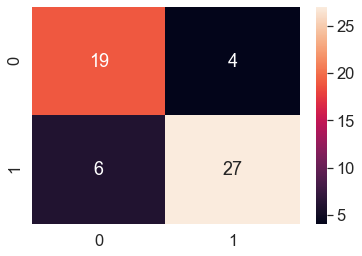

In [70]:
# Plot the confusion matrix and view the confusion matrix by using the logistic regression
sns.set(font_scale=1.5)
cm = confusion_matrix(pred1, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Logistic regression is a type of prediction tools of outcome of a categorical dependent features from a set of predictor or independent features. Logistic regression useally is used to predict and calculate the probability of succeed. Hence, there has used the logistic regression to view the probability of succeed of training the data. The generated confusion matrix shows that the Logistic Regression has correctly predicted 19 individuals who don't have infected heart disease and 27 individuals who have infected heart disease. The remaining 10 predictions are not correct so the accuracncy of the model is only 82.143 %

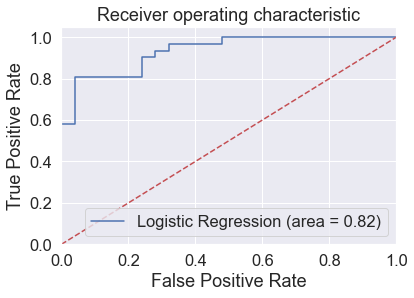

In [71]:
# Plot the ROC graph for the logistic regression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The Reveiver Operating Characteristic (ROC) curve is used to view the trade-offs of different threshoulds, a plot of the probability of the true positive againts the probability of the false positive for all possible selections of thresholds. The optimum position for the ROC curve is moving to the top left corner where the specificity and sensitivity are at optimum levels. Hence, there has shown the area under the ROC curve is 82%, that is somewhat satisfactory.

Decision Tree

In [72]:
# Perform the feature selections
x = df.drop(['target'], axis = 1)
y = df['target']

In [73]:
# Split the data into testing and training data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

dtc = DecisionTreeClassifier(max_depth=3, random_state=0)

# Fit the training data of x and y into the decission tree
dtc.fit(x_train, y_train)

# Generate the prediction value by using the decision tree algorithm
y_pred_dtc = dtc.predict(x_test)
print(y_pred_dtc)

[0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0
 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0]


In [74]:
# Print the classification report of decision tree
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        25
           1       0.76      0.71      0.73        31

    accuracy                           0.71        56
   macro avg       0.71      0.71      0.71        56
weighted avg       0.72      0.71      0.72        56



In [75]:
# Get the accurancy score by using Decision Tree to perform the prediction
score_dtc = accuracy_score(y_pred_dtc,y_test)*100

print("The accuracy score by using Decision Tree to perform the prediction is: ", score_dtc," %")

The accuracy score by using Decision Tree to perform the prediction is:  71.42857142857143  %


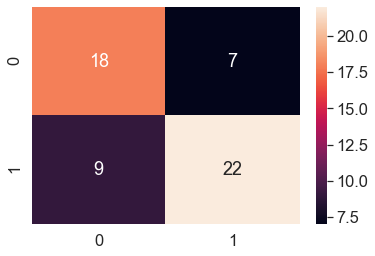

In [76]:
# Display the confusion matrix of the decision tree
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm,annot = True, fmt = "d")

Decision tree algorithm can provide a more influencec method to do the decision because that clearly display the problem so all the options have been displayed can be choosed and tried. That also allow user to analyze and predict the fully possible and probability of a decision. Hence, there has chosen the decision tree algorithm to do the prediction because there can view the result more transparently. The generated confusion matrix shows that the Logistic Regression has correctly predicted 18 individuals who don't have infected heart disease and 22 individuals who have infected heart disease. The remaining 16 predictions are not correct so the accuracncy of the model is only 71.429 %

Compare data model

There can view the different accuracy score between each algorithm, the highest accuracy which has generated by the Logistic Regression algorithm, that is 82% and only incorrectly predicted 10 individuals in 56 individuals. Besides, there has also used other machine learning to do the prediction and the accuracy score which has generated by the Decision Tree machine learning is 71.429%. Its accuracy score is lower than Logistic Regression's accuracy score. At the last machine learning algorithm that has been used in this project is the K-Nearest Neighbors (K-NN) algorithm, the accurancy score of the K-NN algorithm is 66.071%. The accuracy score of 66.071 that has generated by the K-NN has some requirements, which is its K-Value should be 4 then that is the maximum accuracy score for the K-NN algorithm. Therefore, there can based on the accuracy score which has generated by each machine learning algorithm to know which machine learning is most suitable to do the prediction for this dataframe, obviously the most suitable machine learning algorithm is Logistic Regreesion machine learning.

# Interpretation

In this project, there has chosen a couple of machine learning algorithm to perform the prediction to the heart disease dataset. There have used the machine learning algorithms, which is K-Nearest Neigbors machine learning algorithm, Logistic Regression machine learning algorithm, and Decision Tree machine learning algorithm. This three algorithm are suitable for this dataset because the features stored in this dataset are labelled data, so there should use the supervised machine learning to do the prediction. Besides, there have done a couple of times to fit the data model to the dataset, and the result that has gotten from the data model is the Logistic Regression machine learning algorithm is more suitable in this three choices to perform the prediction task. Due to the accuracy of the Logistic Regression machine learning algoritm has get 82%, that is the highest in this three choices and Logistic Regression is also used to find the relationship between each feature that is called 'regression'. The limitation for this project is there should implement more rows and columns in this dataframe, so there can train the model even more and the accuracy of each machine learning algorithm will be more precise as well. The Logistic Regression machine learning algorithm has already achieve my goal in this project because there has already trained the model and based on the training data to perform the predict of the health risk and the presenced of the heart disease. Besides, there can also do some ensemble learning and look at the confusion matrix and computed the data models precision. In the conclusion, there has get Logistic Regression is the best data model in this three data models, and there should try more machine learning algorithm to find which machine learning algorithm can predict the more precision data based on the given training data. Besides, there has found out some preventions to reduce the probabilities to get the heart disease, which is quit smoking, control health conditions (such as high blood pressure, high cholesterol and diabetes), exercise at least 30 minutes a day, control daily diet, maintain body weight in a health condition, reduce and manage stress, and pratice good hygiene. Due to the machine learning algorithm are based on this kinds of factors to perfome the prediction task, and that will increase the probability to get the heart disease as well.